# Iris Classification

## Notebook setup

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Libraries

In [ ]:
# Standard imports
import os

# Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Local imports

In [62]:
sns.set()

## Load Dataset

In [63]:
iris = load_iris()

In [64]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [66]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
X = iris['data']
y = iris['target']

df = pd.DataFrame(X, columns=iris['feature_names'])
df['target'] = y

## Visualization of dataset

### Basic descriptive statistics

In [70]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [71]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [72]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [73]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Distributions of features and target

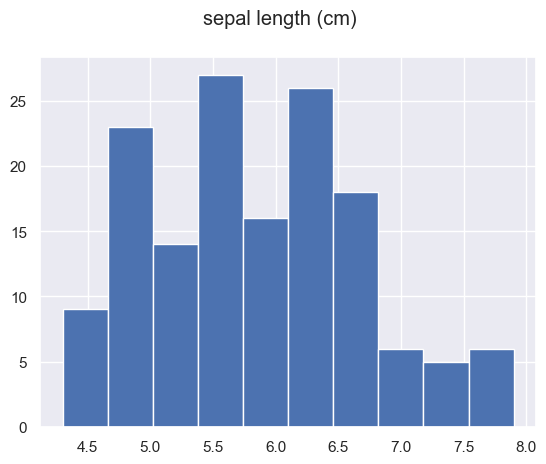

In [77]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

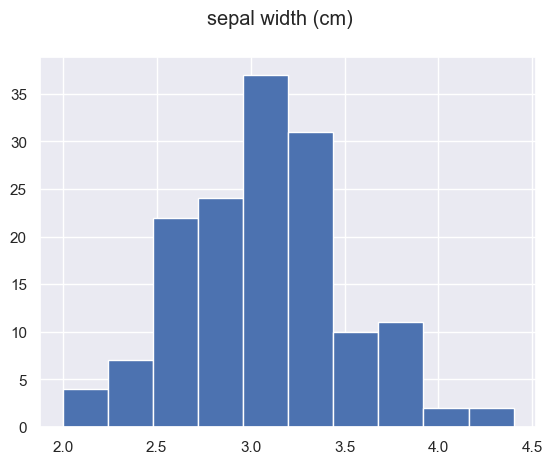

In [78]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

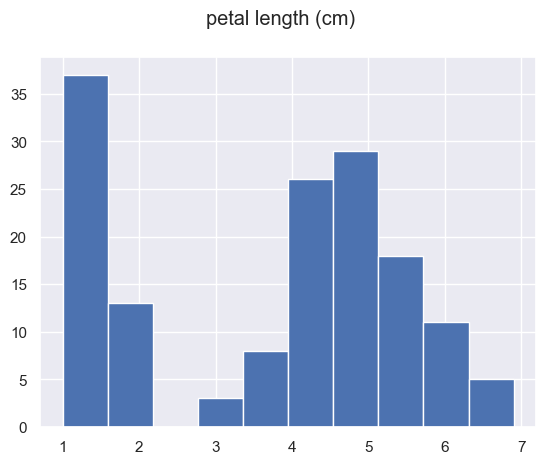

In [79]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

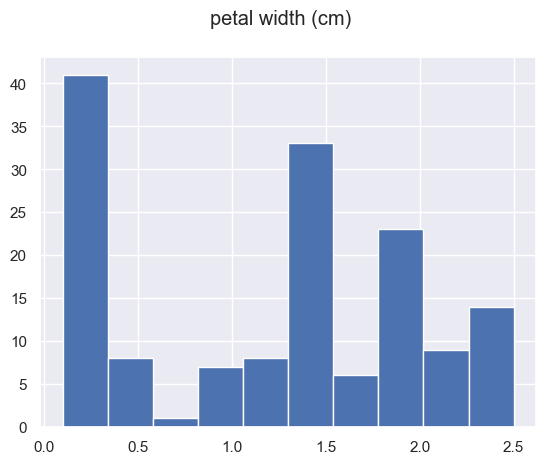

In [80]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

### Relationship of the data features with the target

In [90]:
# Create new column with the species name
df['target_name'] = df['target'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

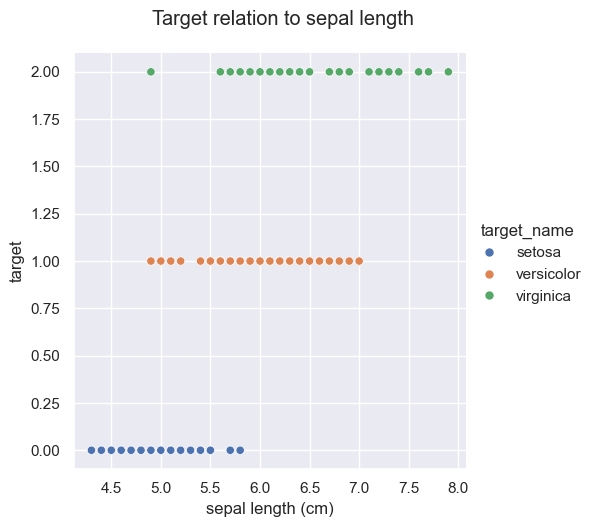

In [101]:
col = "sepal length (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle('Target relation to sepal length', y = 1.05)
plt.show()

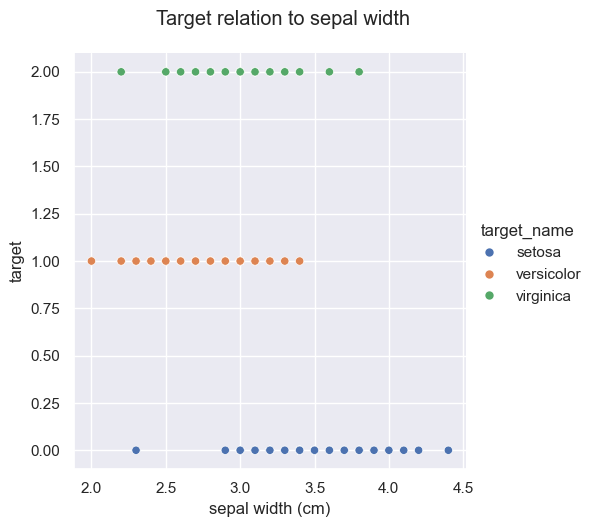

In [102]:
col = "sepal width (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle('Target relation to sepal width', y = 1.05)
plt.show()

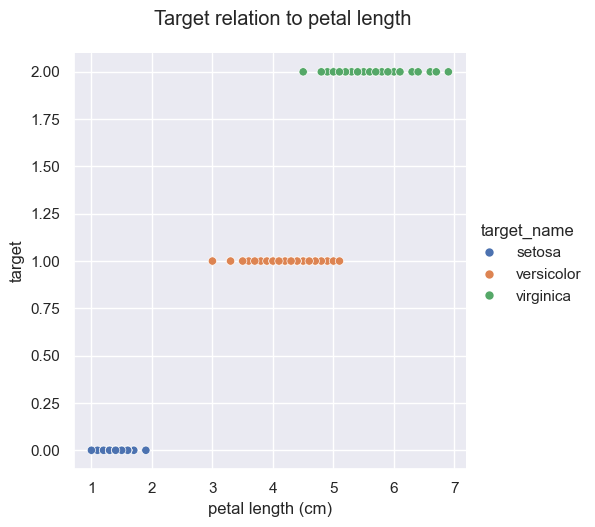

In [103]:
col = "petal length (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle('Target relation to petal length', y = 1.05)
plt.show()

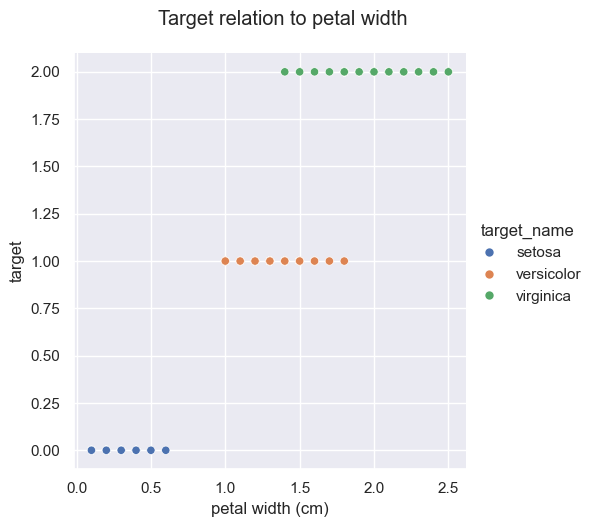

In [104]:
col = "petal width (cm)"
sns.relplot(x = col, y = 'target', hue = 'target_name', data = df)
plt.suptitle('Target relation to petal width', y = 1.05)
plt.show()

### Exploratory Data Analysis (EDA) - Pairplots

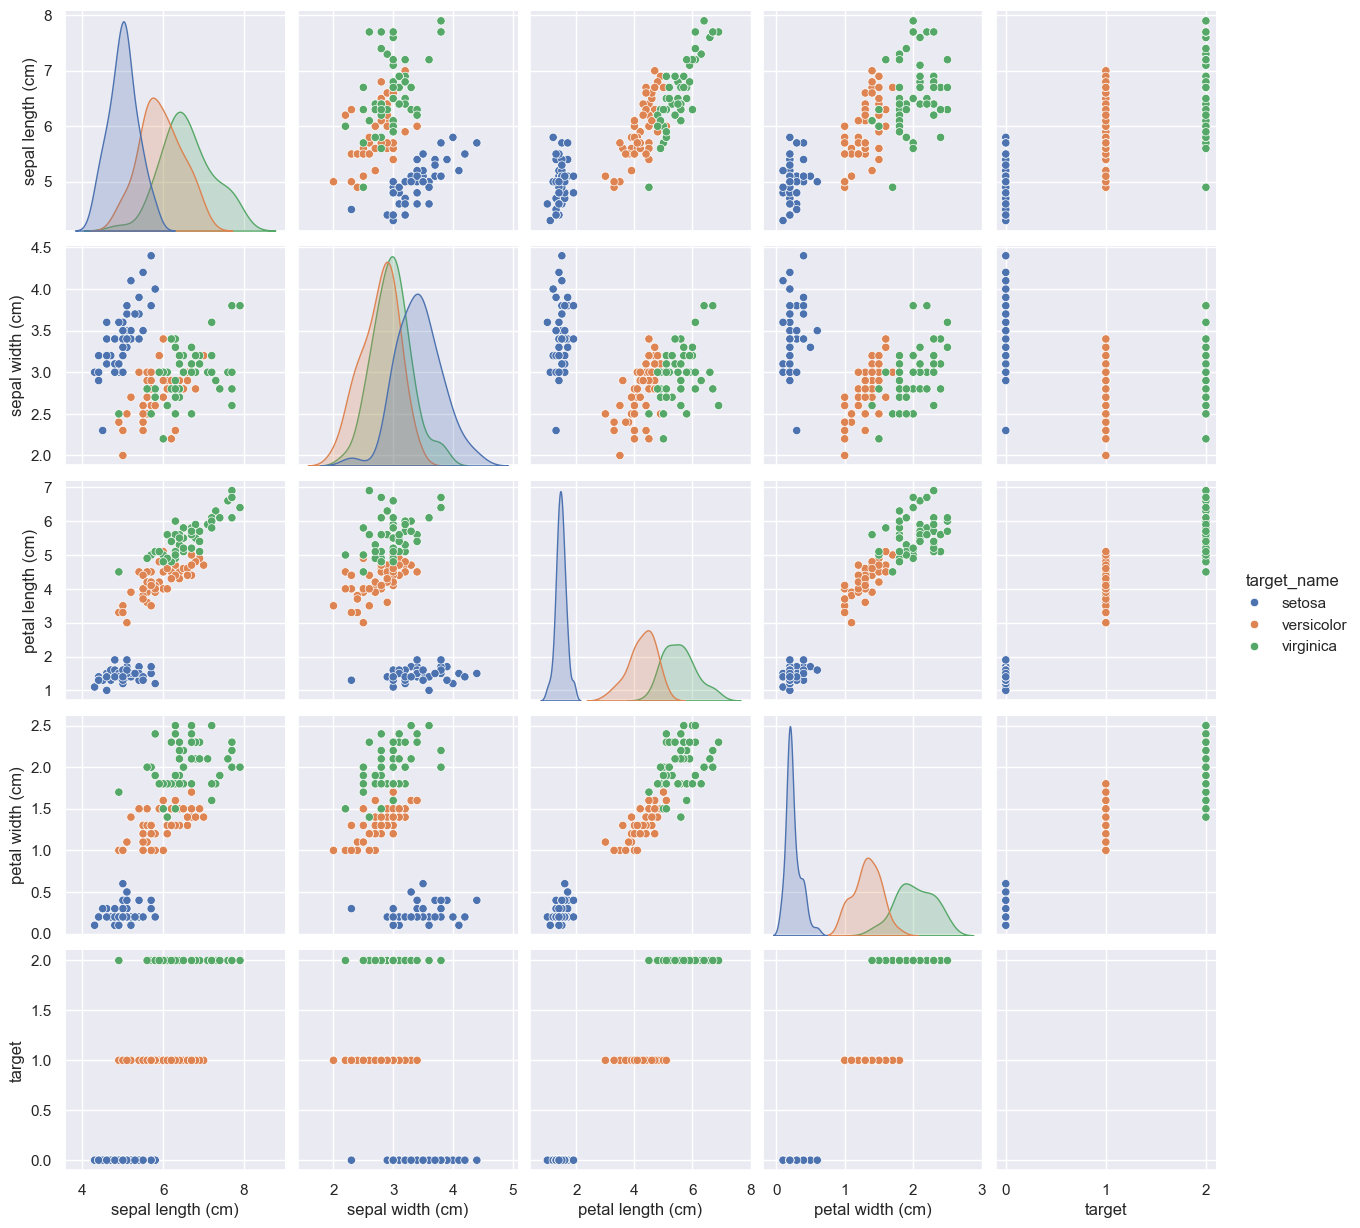

In [107]:
sns.pairplot(df, hue= 'target_name')
plt.show()

## Train/Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Taking as a baseline model a random model. The baseline accuracy would be of 33%, as there is 3 classes each same amount.
My models should and most likely surpass this base.

### Simple manual model

In [118]:
def simple_feature_prediction(petal_length):
    """
    Predicts the iris species given the petal length.
    """
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [111]:
X_train[:, 2]

array([1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4, 1.5, 5.1, 4.5, 4.7,
       1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6, 4.5, 1.4, 6.7, 4.1,
       1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2, 1.5, 4.2, 6.7, 1.4,
       4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. , 1.7, 3.3, 5.3, 1.4,
       1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8, 3. , 5.7, 5.1, 5.6, 6.1,
       4. , 1.4, 1.1, 5. , 6. , 1.5, 1.4, 1.3, 4.9, 5.6, 1.4, 5.5, 6. ,
       1.3, 4.7, 4.6, 4.8, 4.7, 5.3, 1.6, 5.4, 4.2, 5.2, 3.5, 3.9, 4.6,
       1.3, 4.6, 4.4, 1.5, 4.1, 6.3, 5.7, 1.5, 3.3, 5.7, 5.8, 1.4, 5.6,
       1.4, 4.9, 6.1, 5.6, 4.1, 5.5, 4.4, 4.3, 4.9, 5.1, 1.7, 4. , 4.5,
       1.2, 4. , 5.9])

In [121]:
manual_y_pred = np.array([simple_feature_prediction(val) for val in X_train[:, 2]])

In [131]:
manual_model_accuracy = np.mean(manual_y_pred == y_train)

In [138]:
print(f"Manual model accuracy {manual_model_accuracy * 100:.2f}%")

Manual model accuracy 95.00%


### Logistic regression

In [141]:
model = LogisticRegression()

In [142]:
model.fit(X_train, y_train)

LogisticRegression()

In [144]:
y_pred = model.predict(X_test)

In [145]:
np.mean(y_pred == y_test )

1.0

In [146]:
model.score(X_test , y_test)

1.0

## Using cross-validation to evaluate the model

In [150]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [152]:
X_train = df_train.drop(columns=["target","target_name"]).values
y_train = df_train['target'].values

In [ ]:
model = LogisticRegression()

In [155]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

In [156]:
np.mean(accuracies)

0.9739130434782609

### Where are the misclassifications?

In [157]:
y_pred = cross_val_predict(model, X_train, y_train, cv = 5)

In [158]:
predicted_correctly_mask = y_pred == y_train

In [160]:
not_predicted_correctly = ~predicted_correctly_mask

In [161]:
X_train[not_predicted_correctly]

array([[6.3, 2.5, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7]])

In [162]:
df_predictions = df_train.copy()

In [163]:
df_predictions['correct_predictions'] = predicted_correctly_mask

In [166]:
df_predictions['prediction'] = y_pred 

In [168]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

In [170]:
df_predictions[not_predicted_correctly]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
72,6.3,2.5,4.9,1.5,1,versicolor,False,2,virginica
77,6.7,3.0,5.0,1.7,1,versicolor,False,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica,False,1,versicolor


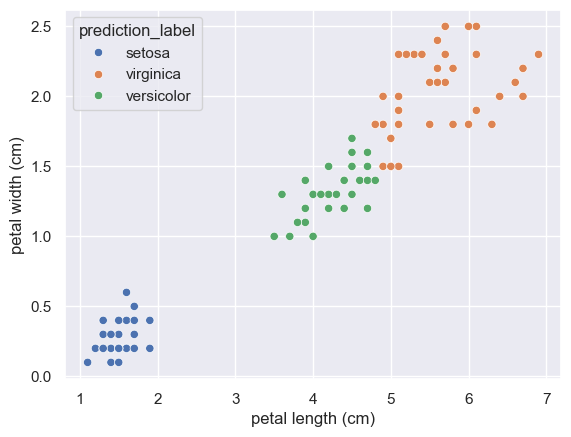

In [176]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue='prediction_label', data=df_predictions)
plt.show()

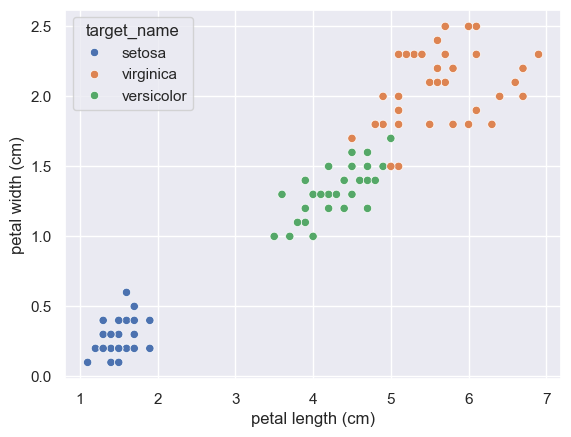

In [174]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue='target', data=df_predictions)
plt.show()

In [196]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10, 10)) 
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data = df_predictions, ax = axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_name', data = df_predictions, ax = axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_predictions', data = df_predictions, ax = axs[2])
    axs[3].set_visible(False)

    plt.show()
    

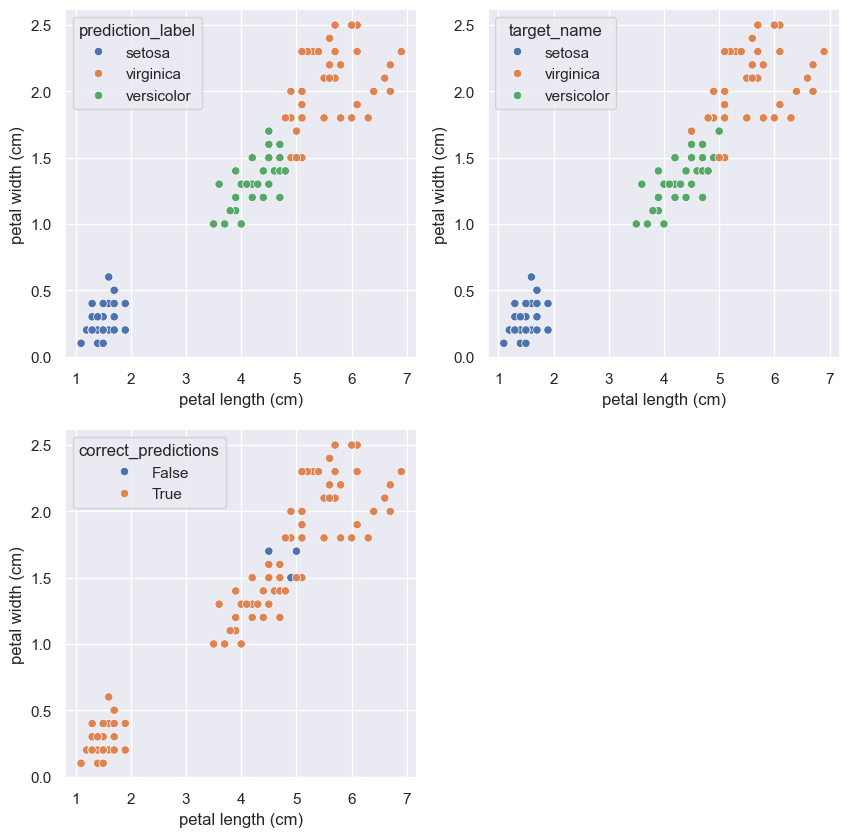

In [197]:
plot_incorrect_predictions(df_predictions,'petal length (cm)','petal width (cm)' )

## Model Tuning

Now lets try optimizing the hyperparameters to maximize the models performance

In [217]:
for reg_params in (2,2.3,2.5,2.8):
    print(reg_params)
    model = LogisticRegression(max_iter = 200, C=reg_params)
    accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring="accuracy")
    print(f"Model accuracy {np.mean(accuracies) * 100:.2f}%")

2
Model accuracy 97.39%
2.3
Model accuracy 98.26%
2.5
Model accuracy 98.26%
2.8
Model accuracy 98.26%


### Final Model

In [213]:
model = LogisticRegression(max_iter = 200, C=2.5)

## How good is on the test set?

In [212]:
X_test = df_test.drop(columns=["target","target_name"]).values
y_test = df_test['target'].values

### Training final model using full training data

In [220]:
model.fit(X_train, y_train)

LogisticRegression(C=2.8, max_iter=200)

In [221]:
y_test_pred = model.predict(X_test)
test_set_correctly_classified = y_test_pred == y_test

In [223]:
print(f"Test set accuracy {np.mean(test_set_correctly_classified) * 100:.2f}%")

Test set accuracy 94.74%


In [224]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_predictions'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred 
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

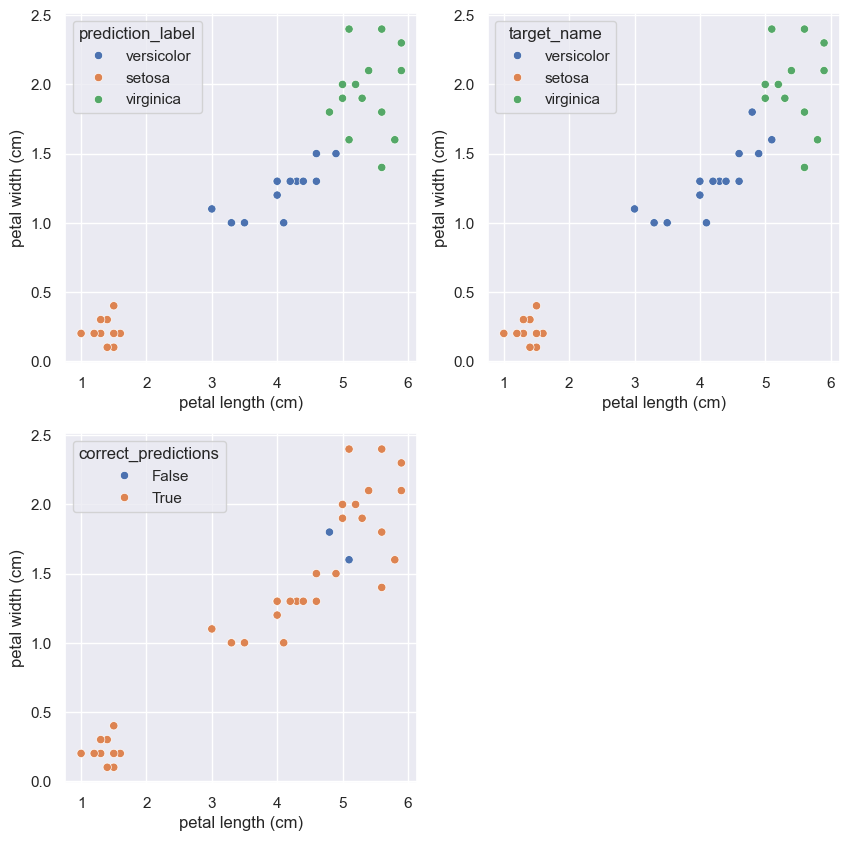

In [227]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

### Save model

In [228]:
joblib.dump(model, "../models/iris_model.pkl")

['../models/iris_model.pkl']

# Conclusion

In conclusion, it was achieved an accuracy of 94.74% on the test dataset using a Logistic Regression model with the following parameters.

```
LogisticRegression(C=2.8, max_iter=200)

```
The other parameters were set on default.